# Supervised Learning Methods

## Naive Bayes Classification
Naive Bayes classifiers are a family of simple probabilistic classifiers based on applying Bayes' theorem with strong (naive) independence assumptions between features.

**Math and Mechanics**:
Bayes' theorem states:
$$ P(A|B) = \frac{P(B|A) \cdot P(A)}{P(B)} $$
Where:
- $ P(A|B) $ is the posterior probability of class (target) given predictor (attributes).
- $ P(A) $ is the prior probability of class.
- $ P(B|A) $ is the likelihood, the probability of predictor given class.
- $ P(B) $ is the prior probability of predictor.

In a classification problem, our goal is to find the class $ C_k $ with the highest posterior probability given the feature vector $ X $. The Naive Bayes classification rule states:
$$ \hat{y} = \arg\max_{k \in \{1, \dots, K\}} P(C_k) \prod_{i=1}^{n} P(x_i | C_k) $$
where $ \hat{y} $ is the predicted class, and $ n $ is the number of features.

#### 2. Assumptions and Why It's Called "Naive":
- **Assumption of Independence**: The most critical assumption is that features are conditionally independent given the class label. This is a naive assumption, hence the name "Naive Bayes", as in real-world data, it's rare that features are completely independent.
- **Other Forms**: Variants of Naive Bayes differ mainly in the assumptions they make regarding the distribution of $ P(x_i | C_k) $:
  - **Gaussian Naive Bayes**: Assumes that the continuous values associated with each class are distributed according to a Gaussian distribution.
  - **Multinomial Naive Bayes**: Typically used for document classification, where the features are the frequencies of the words or tokens.
  - **Bernoulli Naive Bayes**: Used for binary/boolean features.

#### 3. Use Cases:
- **Spam Filtering**: Classifying emails as spam or not spam.
- **Document Classification**: Categorizing news articles into different topics.
- **Sentiment Analysis**: Analyzing text data to predict the sentiment expressed (positive, negative, neutral).

#### 4. Shortcomings and Remedies:
- **Feature Independence**: In reality, features often are not independent. **Remedy**: Use other models that can capture feature dependencies when this assumption is heavily violated.
- **Zero Frequency Problem**: If a categorical variable has a category in the test data set, which was not observed in the training data set, the model will assign it a zero probability and will be unable to make a prediction. **Remedy**: Implementing Laplace estimation (smoothing).
- **Poor Estimator**: Naive Bayes is known to be a bad estimator. **Remedy**: It's generally used for classification rather than estimation tasks.

#### 5. Real-World Example: Weather Prediction
Imagine we want to predict whether it will rain based on two features: whether the sky is cloudy and whether the air pressure is low. Let's say we have the following data:

- 60% of days are rainy (R).
- 50% of days are cloudy (C).
- 40% of days have low pressure (P).
- 80% of rainy days are cloudy.
- 70% of rainy days have low pressure.

Now, we want to predict if it will rain given that it's cloudy and the pressure is low.

**Bayesian Calculation**:
$$ P(R|C, P) = \frac{P(C, P|R) \cdot P(R)}{P(C, P)} $$

Assuming independence (naive assumption):
$$ P(C, P|R) = P(C|R) \cdot P(P|R) $$

Substitute the values:
$$ P(R|C, P) = \frac{P(C|R) \cdot P(P|R) \cdot P(R)}{P(C) \cdot P(P)} $$
$$ = \frac{0.80 \cdot 0.70 \cdot 0.60}{0.50 \cdot 0.40} $$
$$ = \frac{0.336}{0.20} $$
$$ = 1.68 $$

Since this probability is greater than 1, it indicates a high likelihood of rain given the conditions, illustrating the use of Naive Bayes for prediction. Note that this is a simplified example for demonstration; real-world applications would involve more complex calculations and larger datasets.

#### 1. **Bernoulli Naive Bayes (BernoulliNB)**
   - **Math & Assumptions**: Assumes binary (0/1) or Boolean features. It calculates the probability of each feature being present (1) or not (0) in a given class.
   - **Use Case**: Ideal for binary feature datasets like text classification where words are either present (1) or absent (0).



In [ ]:
import pandas as pd
from sklearn import datasets
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import Binarizer

# Load the Iris dataset
iris = datasets.load_iris(as_frame=True)
iris_df = iris.frame
X = iris.data
y = iris.target

# Binarize the dataset
binarizer = Binarizer(threshold=1.5).fit(X)
X_binary = binarizer.transform(X)

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X_binary, y, test_size=0.3, random_state=42)

# Initialize and train Bernoulli Naive Bayes
bnb = BernoulliNB()
bnb.fit(X_train, y_train)

# Predict and evaluate
y_pred = bnb.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("BernoulliNB Accuracy:", accuracy)

BernoulliNB Accuracy: 0.8444444444444444


#### 2. **Categorical Naive Bayes (CategoricalNB)**
   - **Math & Assumptions**: Works with categorical data. It calculates the probability of each category of a feature belonging to a certain class.
   - **Use Case**: Suitable for classification tasks with categorical data like predicting a person's profession based on their education, age group, etc.


In [ ]:
import seaborn as sns
from sklearn.naive_bayes import CategoricalNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

# Load the 'tips' dataset
tips = sns.load_dataset('tips')
print(tips.head())
tips_encoded = tips.select_dtypes(include='category').apply(LabelEncoder().fit_transform)
tips[tips_encoded.columns] = tips_encoded
print(tips.head())


X = tips_encoded.drop('time', axis=1) # 'time' as target
y = tips_encoded['time']

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and train Categorical Naive Bayes
cnb = CategoricalNB()
cnb.fit(X_train, y_train)

# Predict and evaluate
y_pred = cnb.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("CategoricalNB Accuracy:", accuracy)



#### 3. **Complement Naive Bayes (ComplementNB)**
   - **Math & Assumptions**: A variation of MultinomialNB that particularly performs well on imbalanced datasets. It uses the complement of each class to calculate weights.
   - **Use Case**: Often used in text classification, especially when data is skewed.




In [ ]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import ComplementNB
from sklearn.pipeline import make_pipeline

# Load the '20 Newsgroups' dataset
newsgroups_train = fetch_20newsgroups(subset='train')
newsgroups_test = fetch_20newsgroups(subset='test')

# Create a pipeline with TF-IDF Vectorizer and Complement Naive Bayes
cnb_pipeline = make_pipeline(TfidfVectorizer(), ComplementNB())

# Train and evaluate the pipeline
cnb_pipeline.fit(newsgroups_train.data, newsgroups_train.target)
accuracy = cnb_pipeline.score(newsgroups_test.data, newsgroups_test.target)
print("ComplementNB Accuracy:", accuracy)


#### 4. **Gaussian Naive Bayes (GaussianNB)**
   - **Math & Assumptions**: Assumes that features follow a normal distribution. It calculates the mean and variance of each feature for each class.
   - **Use Case**: Effective in cases where features are continuous and normally distributed, such as in predicting housing prices.


In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# Load the Iris dataset (from earlier example)
# Use the same dataset splitting as in the BernoulliNB example

# Initialize Gaussian Naive Bayes
gnb = GaussianNB()

# Train the model
gnb.fit(X_train, y_train)

# Predict and evaluate
y_pred = gnb.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("GaussianNB Accuracy:", accuracy)



#### 5. **Multinomial Naive Bayes (MultinomialNB)**
   - **Math & Assumptions**: Assumes multinomially distributed data. It's based on counting the frequency of each feature's occurrence in a class.
   - **Use Case**: Commonly used in text classification, where the features are typically the counts or frequencies of words.

In [ ]:
from sklearn.naive_bayes import MultinomialNB

# Use the same TF-IDF Vectorizer and dataset from the ComplementNB example

# Create a pipeline with TF-IDF Vectorizer and Multinomial Naive Bayes
mnb_pipeline = make_pipeline(TfidfVectorizer(), MultinomialNB())

# Train and evaluate the pipeline
mnb_pipeline.fit(newsgroups_train.data, newsgroups_train.target)
accuracy = mnb_pipeline.score(newsgroups_test.data, newsgroups_test.target)
print("MultinomialNB Accuracy:", accuracy)


## Decision Trees

Decision Trees are a type of supervised learning algorithm used for both classification and regression tasks. They are known for their simplicity and interpretability.

### Pros and Cons

**Pros:**
- **Interpretability:** Easy to understand and interpret.
- **Non-Parametric:** No assumptions about the distribution of data.
- **Handles Mixed Data:** Can handle both numerical and categorical data.
- **Capability:** Can model complex decision boundaries.

**Cons:**
- **Overfitting:** Prone to overfitting, especially with complex trees.
- **Instability:** Small changes in the data can lead to different tree structures.
- **Biased Trees:** Can create biased trees if some classes dominate.

### Use Cases

- **Classification Tasks:** Such as email spam detection, customer segmentation.
- **Regression Tasks:** Forecasting numerical values like house prices.
- **Data Exploration:** Helps in understanding the data structure.

### Node Splitting Metrics in Decision Trees

A decision tree splits the data into subsets based on the value of input features. This process is repeated recursively, forming a tree structure.

1. Gini Impurity

**Gini Impurity** is another measure used to decide how to split the data at a node. It is calculated as:

$$
 0 ≤ Gini(D) = 1 - \sum_{i=1}^{n} p_i^2 \le 1/2
$$

Where:
- $D$ is the dataset.
- $p_i$ is the proportion of the data belonging to class $i$ in the dataset.

A lower Gini Impurity score indicates a better split.

2. Information Gain (using Entropy)

**Entropy** is a measure of the randomness or impurity in the dataset and is used in the calculation of Information Gain. The formula for entropy for a dataset is:

$$
Entropy(S) = - \sum_{i=1}^{n} p_i \log_2(p_i)
$$

Where:
- $S$ is the dataset for which entropy is being calculated.
- $p_i$ is the proportion of the data belonging to class $i$ in the dataset.

Entropy is used in Information Gain, which is a metric for the effectiveness of a feature in classifying the training data. The Information Gain is calculated as:

$$
IG(D_p, A) = Entropy(D_p) - \sum \left( \frac{|D_j|}{|D_p|} \times Entropy(D_j) \right)
$$

Where:
- $IG(D_p, A)$ is the Information Gain of a dataset $D_p$ after it is split on attribute $A$.
- $Entropy(D_p)$ is the entropy of the entire dataset.
- $|D_j|$ is the number of elements in subset $j$.
- $|D_p|$ is the number of elements in the entire dataset.
- $Entropy(D_j)$ is the entropy of subset $j$.


3. Log Loss (Cross-Entropy Loss)

**Log Loss** or **Cross-Entropy Loss** is often used in binary classification problems. It is defined as:

$$
Log Loss = - \frac{1}{N} \sum_{i=1}^{N} [y_i \log(\hat{y}_i) + (1 - y_i) \log(1 - \hat{y}_i)]
$$

Where:
- $N$ is the number of observations.
- $y_i$ is the actual label of the $i^{th}$ observation.
- $\hat{y}_i$ is the predicted probability of the $i^{th}$ observation for the positive class.

Log Loss penalizes false classifications more heavily, making it a stringent measure of the effectiveness of the classifier.


### Hyperparameters

1. **Max Depth:** The maximum depth of the tree.
2. **Min Samples Split:** The minimum number of samples required to split a node.
3. **Min Samples Leaf:** The minimum number of samples required to be at a leaf node.
4. **Criterion:** The function to measure the quality of a split (e.g., Gini, entropy).


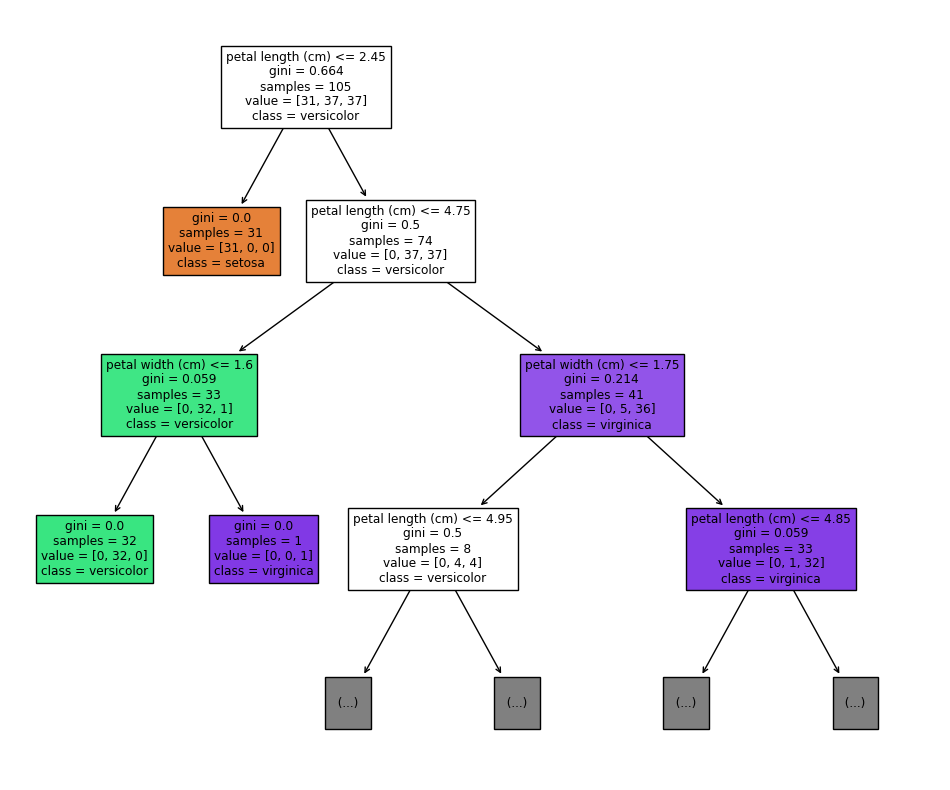

Confusion Matrix:
 [[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45

Best Parameters: {'max_depth': 4, 'min_samples_leaf': 4, 'min_samples_split': 2}
Best Score: 0.942638234781092
Cross-validated Scores on Test Set: [0.88888889 1.         0.88888889 1.         1.        ]


In [ ]:
# Import necessary libraries
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, classification_report, make_scorer, f1_score
import matplotlib.pyplot as plt

# Load the dataset
iris = load_iris()
X, y = iris.data, iris.target

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the DecisionTreeClassifier
tree = DecisionTreeClassifier(random_state=42)

# Fit the model on training data
tree.fit(X_train, y_train)

# Plot the tree
plt.figure(figsize=(12, 10))
plot_tree(tree, filled=True, max_depth = 3 , feature_names=iris.feature_names, class_names=iris.target_names)
plt.show()

# Model Evaluation
y_pred = tree.predict(X_test)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Hyperparameter Tuning using GridSearchCV and Cross-Validation
param_grid = {
    'max_depth': [3, 4, 5, 6, 7, 8, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Assign a set of scoring metrics to capture
scoring = {'accuracy', 'precision', 'recall', 'f1'}

# Define a scoring function that uses weighted average for multi-class F1 score
f1_weighted = make_scorer(f1_score, average='weighted')

grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5,
                           scoring={'f1': f1_weighted},
                           refit='f1')

#grid_search = GridSearchCV(tree, param_grid, cv=5,scoring= 'accuracy')

grid_search.fit(X_train, y_train)

# Best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

# Evaluating the best model from GridSearchCV on the test set
best_tree = grid_search.best_estimator_
cross_val_scores = cross_val_score(best_tree, X_test, y_test, cv=5)
print("Cross-validated Scores on Test Set:", cross_val_scores)


In [ ]:
# Standard operational package imports
import numpy as np
import pandas as pd

# Important imports for modeling and evaluation
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
import sklearn.metrics as metrics

# Visualization package imports
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df_original = pd.read_csv("Invistico_Airline.csv")

# Output the first 10 rows of data
df_original.head(n=10)

# Check data types
df_original.dtypes

# Output unique values in the 'Class' column
df_original["Class"].unique()

# Check the counts of the predicted labels
df_original['satisfaction'].value_counts(dropna=False)

# Check for missing values
df_original.isnull().sum()

# Check the number of rows and columns in the dataset
df_original.shape

# Drop rows with missing values
df_subset = df_original.dropna(axis=0).reset_index(drop=True)

# Check for missing values again
df_subset.isna().sum()

# Check the number of rows and columns in the dataset again
df_subset.shape

# Encode the 'Class' column
df_subset['Class'] = df_subset['Class'].map({"Business": 3, "Eco Plus": 2, "Eco": 1})

# Represent the 'satisfaction' column numerically
df_subset['satisfaction'] = df_subset['satisfaction'].map({"satisfied": 1, "dissatisfied": 0})

# Convert other categorical columns into numeric
df_subset = pd.get_dummies(df_subset, drop_first=True)

# Check column data types
df_subset.dtypes

# Create the training and testing data
y = df_subset["satisfaction"]
X = df_subset.drop("satisfaction", axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

# Fit a decision tree classifier model to the data
decision_tree = DecisionTreeClassifier(random_state=0)
decision_tree.fit(X_train, y_train)
dt_pred = decision_tree.predict(X_test)

# Print out model evaluation metrics
print("Decision Tree")
print("Accuracy:", "%.6f" % metrics.accuracy_score(y_test, dt_pred))
print("Precision:", "%.6f" % metrics.precision_score(y_test, dt_pred))
print("Recall:", "%.6f" % metrics.recall_score(y_test, dt_pred))
print("F1 Score:", "%.6f" % metrics.f1_score(y_test, dt_pred))

# Produce a confusion matrix
cm = metrics.confusion_matrix(y_test, dt_pred, labels=decision_tree.classes_)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=decision_tree.classes_)
disp.plot()

# Plot the decision tree
plt.figure(figsize=(20, 12))
plot_tree(decision_tree, max_depth=2, fontsize=14, feature_names=X.columns)

# Hyperparameter tuning
tree_para = {'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 30, 40, 50],
             'min_samples_leaf': [2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20, 50]}
scoring = {'accuracy', 'precision', 'recall', 'f1'}

tuned_decision_tree = DecisionTreeClassifier(random_state=0)
clf = GridSearchCV(tuned_decision_tree, tree_para, scoring=scoring, cv=5, refit="f1")
clf.fit(X_train, y_train)

# Compute the best combination of values for the hyperparameters
clf.best_estimator_

# Determine the best average validation score
print("Best Avg. Validation Score: ", "%.4f" % clf.best_score_)



results = pd.DataFrame(columns=['Model', 'F1', 'Recall', 'Precision', 'Accuracy'])

def make_results(model_name, model_object):
    """
    Accepts as arguments a model name (your choice - string) and
    a fit GridSearchCV model object.

    Returns a pandas df with the F1, recall, precision, and accuracy scores
    for the model with the best mean F1 score across all validation folds.
    """

    # Get all the results from the CV and put them in a df.
    cv_results = pd.DataFrame(model_object.cv_results_)

    # Isolate the row of the df with the max(mean f1 score).
    best_estimator_results = cv_results.iloc[cv_results['mean_test_f1'].idxmax(), :]

    # Extract accuracy, precision, recall, and f1 score from that row.
    f1 = best_estimator_results.mean_test_f1
    recall = best_estimator_results.mean_test_recall
    precision = best_estimator_results.mean_test_precision
    accuracy = best_estimator_results.mean_test_accuracy

    # Create a table of results.
    table = pd.DataFrame()
    table = table.append({'Model': model_name,
                          'F1': f1,
                          'Recall': recall,
                          'Precision': precision,
                          'Accuracy': accuracy},
                         ignore_index=True)

    return table

result_table = make_results("Tuned Decision Tree", clf)

result_table


plt.figure(figsize=(20,12))
plot_tree(clf.best_estimator_, max_depth=2, fontsize=14, feature_names=X.columns);

# Feature importance graph
importances = clf.best_estimator_.feature_importances_
forest_importances = pd.Series(importances, index=X.columns).sort_values(ascending=False)
fig, ax = plt.subplots()
forest_importances.plot.bar(ax=ax);


## Bagging and Ensemble Learning
When mistakes between learners are uncorrelated, it reduces both bias and variance.

## Overview

Ensemble learning is a machine learning paradigm where multiple models (often called "weak learners") are trained to solve the same problem and combined to get better results. The main principle behind ensemble learning is that a group of weak learners can come together to form a strong learner, thus increasing the accuracy of the model.

### Bagging

Bagging, or Bootstrap Aggregating, is a method in ensemble learning where multiple versions of a predictor are trained on different subsets of the training data. The subsets are usually created by bootstrap sampling, which means randomly selecting samples from the training dataset with replacement.

#### Random Forest

Random Forest is a popular bagging technique that uses Decision Trees as weak learners. In a Random Forest, each tree is trained on a random subset of the data and makes its predictions. The final prediction is typically the average of all the trees' predictions.

##### Hyperparameters


1. `n_estimators`:
   - **Explanation**: This hyperparameter controls the number of decision trees in the Random Forest ensemble. You can specify it as an integer value, indicating the exact number of trees to use.
   - **Example**: `n_estimators=100` (Uses 100 decision trees)

2. `criterion`:
   - **Explanation**: Specifies the function to measure the quality of a split in each decision tree. It can take two string values: 'gini' for Gini impurity or 'entropy' for information gain.
   - **Example**: `criterion='gini'`

3. `max_depth`:
   - **Explanation**: Determines the maximum depth of each decision tree in the ensemble. You can set it as an integer value to define the maximum depth. Use `None` to allow trees to expand until leaves are pure or contain less than `min_samples_split` samples.
   - **Example**: `max_depth=10`

4. `min_samples_split`:
   - **Explanation**: Specifies the minimum number of samples required to split an internal node. This hyperparameter accepts integer values or floats between 0 and 1. An integer value represents the minimum number of samples, while a float represents a fraction of the total number of samples.
   - **Examples**: `min_samples_split=2` (Minimum 2 samples for a split), `min_samples_split=0.1` (Minimum 10% of samples for a split)

5. `min_samples_leaf`:
   - **Explanation**: Sets the minimum number of samples required to be at a leaf node. Similar to `min_samples_split`, it can accept integer values or floats between 0 and 1.
   - **Examples**: `min_samples_leaf=1` (Minimum 1 sample at a leaf), `min_samples_leaf=0.05` (Minimum 5% of samples at a leaf)

6. `max_features`:
   - **Explanation**: Determines the number of features to consider when making a split. It can take several types of input:
     - An integer value: Specifies the exact number of features to consider.
     - A float value: Represents a fraction of total features.
     - "auto" or "sqrt": Uses the square root of the total features.
     - "log2": Uses the base-2 logarithm of the total features.
     - None: Uses all features.
   - **Examples**: `max_features=10` (Considers 10 features), `max_features='sqrt'` (Uses the square root of features), `max_features=None` (Uses all features)

7. `bootstrap`:
   - **Explanation**: Specifies whether to use bootstrapping (random sampling with replacement) when constructing subsets of the dataset for each tree. It accepts a Boolean value (`True` or `False`).
   - **Examples**: `bootstrap=True` (Uses bootstrapping), `bootstrap=False` (Doesn't use bootstrapping)

8. `n_jobs`:
   - **Explanation**: Controls the number of CPU cores to use during model training. You can specify it as an integer value or set it to `-1` to use all available cores for parallel processing.
   - **Examples**: `n_jobs=4` (Uses 4 CPU cores), `n_jobs=-1` (Uses all available cores)

### Boosting

Boosting is another ensemble technique that builds a series of weak learners in a very adaptive way: subsequent models are trained to correct the errors made by previous models.

#### Mathematics and Mechanics

- Weak learners are added sequentially and adjusted to correct the errors from previous models.
- The predictions are combined through a weighted majority vote (classification) or a weighted sum (regression) to produce the final prediction.

#### Hyperparameters

- **Learning Rate**: Determines the contribution of each tree in the final combination.
- **Number of Weak Learners**: Controls the number of sequential trees to model.

## Comparison Table

| Feature/Method | Bagging (Random Forest) | Boosting |
|----------------|-------------------------|----------|
| **Main Idea** | Combine multiple independent models to get an average prediction | Sequentially build models to correct the predecessors' mistakes |
| **Pros** | Reduces variance, robust to overfitting | Can turn weak learners into a strong learner, reduces bias and variance |
| **Cons** | May be computationally intensive | Can be prone to overfitting, sensitive to outliers |
| **Best Use Case** | Problems where high variance is a concern (e.g., Decision Trees) | Problems where bias is more of a concern, or with structured data like in classification problems |


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV, train_test_split, PredefinedSplit
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier
import pickle
import os

from google.colab import drive
drive.mount('/content/drive')

path = "/content/drive/My Drive/Books/ML/data_sets"
os.chdir(path)
!ls

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
'Bank Customer Churn Prediction.csv'   Invistico_Airline.csv


In [ ]:
# Set option to display all columns in pandas
pd.set_option('display.max_columns', None)

# Read in data
file = 'Bank Customer Churn Prediction.csv'
df_original = pd.read_csv(file)

# Feature engineering
# Drop irrelevant columns
churn_df = df_original.drop(['customer_id', 'gender'], axis=1)
churn_df.info()

# Dummy encode categorical variables
churn_df2 = pd.get_dummies(churn_df, drop_first=True)

# Split the data into train and test sets
y = churn_df2["churn"]
X = churn_df2.drop("churn", axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,
                                                    stratify=y, random_state=42)

# Cross-validated hyperparameter tuning
rf = RandomForestClassifier(random_state=0)

cv_params = {
    'max_depth': [2, 3, 4, 5, None],
    'min_samples_leaf': [1, 2, 3],
    'min_samples_split': [2, 3, 4],
    'max_features': [2, 3, 4],
    'n_estimators': [75, 100, 125, 150]
}

scoring = {'accuracy', 'precision', 'recall', 'f1'}

rf_cv = GridSearchCV(rf, cv_params, scoring=scoring, cv=5, refit='f1')

rf_cv.fit(X_train, y_train)

# # Pickle the cross-validated model
# with open(path + 'rf_cv_model.pickle', 'wb') as to_write:
#     pickle.dump(rf_cv, to_write)

# # Read in pickled cross-validated model
# with open(path + 'rf_cv_model.pickle', 'rb') as to_read:
#     rf_cv = pickle.load(to_read)

# Check best hyperparameters and F1 score
print("Best Hyperparameters:", rf_cv.best_params_)
print("Best F1 Score:", rf_cv.best_score_)

# Function to extract model evaluation results
def make_results(model_name, model_object):
    cv_results = pd.DataFrame(model_object.cv_results_)
    best_estimator_results = cv_results.iloc[cv_results['mean_test_f1'].idxmax(), :]
    f1 = best_estimator_results.mean_test_f1
    recall = best_estimator_results.mean_test_recall
    precision = best_estimator_results.mean_test_precision
    accuracy = best_estimator_results.mean_test_accuracy
    table = pd.DataFrame({
        'Model': [model_name],
        'F1': [f1],
        'Recall': [recall],
        'Precision': [precision],
        'Accuracy': [accuracy]
    })
    return table

# Make results table for the cross-validated model
rf_cv_results = make_results('Random Forest CV', rf_cv)

# Hyperparameter tuning with a separate validation set
X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train, test_size=0.2, stratify=y_train, random_state=10)

# Create list of split indices
split_index = [0 if x in X_val.index else -1 for x in X_train.index]

# Instantiate PredefinedSplit
custom_split = PredefinedSplit(split_index)

# Create a new Random Forest model for validation
rf = RandomForestClassifier(random_state=0)

cv_params = {
    'max_depth': [2, 3, 4, 5, None],
    'min_samples_leaf': [1, 2, 3],
    'min_samples_split': [2, 3, 4],
    'max_features': [2, 3, 4],
    'n_estimators': [75, 100, 125, 150]
}

scoring = {'accuracy', 'precision', 'recall', 'f1'}

rf_val = GridSearchCV(rf, cv_params, scoring=scoring, cv=custom_split, refit='f1')

# Fit the model with validation set
rf_val.fit(X_train, y_train)

# Pickle the validated model
with open(path + 'rf_val_model.pickle', 'wb') as to_write:
    pickle.dump(rf_val, to_write)

# Read in pickled validated model
with open(path + 'rf_val_model.pickle', 'rb') as to_read:
    rf_val = pickle.load(to_read)

# Check best hyperparameters for the validated model
print("Best Hyperparameters for Validated Model:", rf_val.best_params_)

# Create model results table for the validated model
rf_val_results = make_results('Random Forest Validated', rf_val)

# Concatenate results to the master results table
results = pd.concat([rf_val_results, results])

# Sort results by F1 score in descending order
results.sort_values(by=['F1'], ascending=False)

# Save the combined results to a CSV file
results.to_csv(path + 'results2.csv', index=False)


### Adaboost (Adaptive Boosting)


AdaBoost, or Adaptive Boosting, is an ensemble learning technique that builds a strong classifier by combining multiple poorly performing classifiers. It's one of the most popular boosting techniques used to improve the accuracy of machine learning models.


AdaBoost works by sequentially adding models to the ensemble where each subsequent model attempts to correct the errors of its predecessors. The core concept is to set the weights of classifiers and training data in each iteration to ensure that the subsequent classifiers focus more on difficult cases.

### Algorithm

1. **Initialize Weights**: All training instances are given an equal weight.
2. **For Each Iteration**:
   - Train a weak learner.
   - Calculate the error rate.
   - Assign higher weights to incorrectly predicted instances.
3. **Combine Learners**: Aggregate the weak learners into a single strong learner.

### Mathematical Formulation

- **Weight Update**: The weight of each instance is updated such that the weights of incorrectly classified instances are increased.
  
  $$ w_i \leftarrow w_i \cdot \exp(\alpha_t \cdot I(y_i \neq h_t(x_i))) $$

  where $ w_i $ is the weight of the $ i^{th} $ instance, $ \alpha_t $ is the weight of the $ t^{th} $ classifier, $ y_i $ is the true label, $ h_t(x_i) $ is the prediction, and $ I $ is the indicator function.

- **Classifier Weight**: Calculated based on its accuracy.

  $$ \alpha_t = \frac{1}{2} \ln \left(\frac{1 - \text{error}_t}{\text{error}_t}\right) $$


#### Pros

- **Improved Accuracy**: Combines multiple weak learners to create a strong learner.
- **Less Prone to Overfitting**: Especially in low-dimensional datasets.
- **Feature Selection**: Focuses on the features that improve the predictive power of the model.

#### Cons

- **Sensitive to Noisy Data and Outliers**: Because it tries to correct all misclassifications.
- **Computationally Intensive**: As it builds multiple models in sequence.

#### Use Cases

- **Binary Classification Problems**: Especially effective for binary categorization.
- **As a Base for More Complex Models**: Often used as a foundation for more sophisticated algorithms.


## Hyperparameters and Their Explanations

1. **Number of Estimators (`n_estimators`)**: The maximum number of estimators at which boosting is terminated. In case of a perfect fit, the learning procedure is stopped early. *Reasonable values*: 50, 100, 200.

2. **Learning Rate (`learning_rate`)**: Shrinks the contribution of each classifier. There is a trade-off between `learning_rate` and `n_estimators`. *Reasonable values*: 0.01, 0.1, 1.

3. **Loss Function (`loss`)**: Used when updating weights after each boosting iteration. Common choices are `linear`, `square`, and `exponential`.

4. **Base Estimator (`base_estimator`)**: The model to ensemble. By default, AdaBoost uses Decision Trees of depth 1.


In [ ]:
# Step 1: Importing necessary libraries
from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Step 2: Load the Iris dataset
iris = load_iris()
X, y = iris.data, iris.target

# Step 3: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 4: Create AdaBoost model
# We use a Decision Tree Classifier as the base estimator.
# You can modify the n_estimators and learning_rate parameters as needed.
ada_clf = AdaBoostClassifier(n_estimators=50, learning_rate=1)

# Train the AdaBoost model
ada_clf.fit(X_train, y_train)

# Step 5: Make predictions and evaluate the model
y_pred = ada_clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy of the AdaBoost model: {accuracy:.2f}")


### Gradient Boosting Machines (GBM)

Gradient Boosting Machines are a type of ensemble learning technique, specifically a boosting method, where new models are added sequentially to correct the errors made by existing models.

### Algorithm

1. **Initialization**: Start with an initial model, usually a simple one like a decision stump (a tree with a single split). This model makes the initial predictions for all observations in the dataset.

2. **Iterative Improvement**:
   - For each iteration:
     - Calculate the residual errors $ϵ = y - ŷ $.
     - Train a new model on these residuals as the target variable. $model(X,ϵ)$
     - Add this new model to the ensemble, with an optimal weight to minimize the loss function.

### Mathematics

- **Loss Function**: A differentiable loss function is used to calculate the residuals. For regression, it is often mean squared error (MSE), and for classification, it is often logarithmic loss.

  $$ L(y, F(x)) $$
  
  where $ L $ is the loss function, $ y $ is the actual value, and $ F(x) $ is the model prediction.

- **Gradient Descent**: Used to minimize the loss function. The negative gradient of the loss function with respect to the prediction is computed and used to update the model.

  $$ F_{m}(x) = F_{m-1}(x) + \rho_m h_m(x) $$

  Here, $ F_{m}(x) $ is the updated model, $ F_{m-1}(x) $ is the previous model, $ \rho_m $ is the learning rate, and $ h_m(x) $ is the weak learner.

## Pros, Cons, and Use Cases

### Pros

- **High Performance**: Often provides predictive accuracy that is unrivaled by other algorithms.
- **Flexibility**: Can be used for both regression and classification problems.
- **Handling of Various Types of Data**: Effective with different types of features—numerical, categorical.

### Cons

- **Prone to Overfitting**: Especially in the presence of noisy data.
- **Computationally Intensive**: Requires substantial computational resources, especially with large datasets.
- **Requires Careful Tuning**: Sensitive to hyperparameter settings.

### Use Cases

- **Predictive Modeling**: Where predictive accuracy is paramount, such as in competitions like Kaggle.
- **Anomaly Detection**: In scenarios where patterns are complex and data is abundant.

$$\small
\begin{array}{|c|c|c|c|}
\hline
\textbf{Hyperparameter} & \textbf{What it does} & \textbf{Input type} & \textbf{Default Value} \\
\hline
\text{n_estimators} & \text{Specifies the number of boosting rounds} & \text{int} & \text{100} \\
\hline
\text{max_depth} & \text{Specifies how many levels your base learner trees can have} & \text{int} & \text{6} \\
\hline
\text{min_child_weight} & \text{Controls threshold below which a node becomes a leaf} & \text{int or float} & \text{1} \\
\hline
\text{learning_rate} & \text{Controls how much importance is given to each base learner} & \text{float} & \text{0.3} \\
\hline
\text{colsample_bytree} & \text{Specifies the percentage of features selected during training} & \text{float} & \text{1.0} \\
\hline
\text{subsample} & \text{Specifies the percentage of observations sampled from the dataset} & \text{float} & \text{1.0} \\
\hline
\end{array}
$$


$$
\small
\begin{array}{|l|l|l|l|l|}
\hline
\textbf{Aspect / Algorithm} & \textbf{Decision Trees} & \textbf{Random Forest} & \textbf{AdaBoost} & \textbf{GBM} \\
\hline
\text{Pros} & \text{Simple to understand and interpret. Requires little data preparation. Can handle both numerical and categorical data} & \text{Handles higher dimensionality well. Reduces overfitting compared to Decision Trees. Good accuracy for many problems} & \text{Improves classification accuracy. Less prone to overfitting compared to Decision Trees. Automatically handles missing values and variable selection} & \text{Often provides the best predictive accuracy. Highly flexible: can optimize on different loss functions and provides several hyperparameter tuning options. Robust to outliers in output space} \\
\hline
\text{Cons} & \text{Prone to overfitting, especially with complex trees. Can be unstable because small variations in data might result in a completely different tree} & \text{Can be complex and require more computational resources and time. Model interpretation is not as straightforward as Decision Trees} & \text{Sensitive to noisy data and outliers. Performance depends on data and weak learner. Can be slower to train due to sequential nature} & \text{Prone to overfitting if not tuned properly. Computationally demanding. Requires careful tuning of parameters and understanding of the underlying mathematics} \\
\hline
\text{Use Cases} & \text{Classification and regression tasks where model interpretability is important. Situations where data preparation is a challenge} & \text{General-purpose machine learning tasks. Situations where model accuracy is crucial and complexity is not an issue} & \text{Binary classification problems. As a base for more complex models in competitions like Kaggle} & \text{Predictive modeling where performance is critical. Problems with complex patterns in data. Anomaly detection in complex datasets} \\
\hline
\text{Best Suited For} & \text{Simple problems where interpretability is more important than accuracy} & \text{Problems with complex data but where a balance between accuracy and model interpretability is required} & \text{Enhancing the performance of weak models. Situations where boosting can improve results over single models} & \text{High-performance tasks where model accuracy is paramount. Large datasets with complex patterns} \\
\hline
\end{array}
$$


### Comparison of Machine Learning Algorithms

| Aspect / Algorithm | Decision Trees | Random Forest | AdaBoost | GBM |
|--------------------|----------------|---------------|----------|-----|
| **Pros**           | - Simple to understand and interpret<br>- Requires little data preparation<br>- Can handle both numerical and categorical data | - Handles higher dimensionality well<br>- Reduces overfitting compared to Decision Trees<br>- Good accuracy for many problems | - Improves classification accuracy<br>- Less prone to overfitting compared to Decision Trees<br>- Automatically handles missing values and variable selection | - Often provides the best predictive accuracy<br>- Highly flexible: can optimize on different loss functions and provides several hyperparameter tuning options<br>- Robust to outliers in output space |
| **Cons**           | - Prone to overfitting, especially with complex trees<br>- Can be unstable because small variations in data might result in a completely different tree | - Can be complex and require more computational resources and time<br>- Model interpretation is not as straightforward as Decision Trees | - Sensitive to noisy data and outliers<br>- Performance depends on data and weak learner<br>- Can be slower to train due to sequential nature | - Prone to overfitting if not tuned properly<br>- Computationally demanding<br>- Requires careful tuning of parameters and understanding of the underlying mathematics |
| **Use Cases**      | - Classification and regression tasks where model interpretability is important<br>- Situations where data preparation is a challenge | - General-purpose machine learning tasks<br>- Situations where model accuracy is crucial and complexity is not an issue | - Binary classification problems<br>- As a base for more complex models in competitions like Kaggle | - Predictive modeling where performance is critical<br>- Problems with complex patterns in data<br>- Anomaly detection in complex datasets |
| **Best Suited For**| - Simple problems where interpretability is more important than accuracy | - Problems with complex data but where a balance between accuracy and model interpretability is required | - Enhancing the performance of weak models<br>- Situations where boosting can improve results over single models | - High-performance tasks where model accuracy is paramount<br>- Large datasets with complex patterns |


In [17]:
import numpy as np
import pandas as pd
from xgboost import XGBClassifier, plot_importance
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay, RocCurveDisplay
import matplotlib.pyplot as plt
import pickle
import os

from google.colab import drive
drive.mount('/content/drive')

path = "/content/drive/My Drive/Books/ML/xgb/"
os.chdir(path)
!ls

# Display all columns
pd.set_option('display.max_columns', None)

# Read in data
file = 'Churn_Modelling.csv'
df_original = pd.read_csv(file)

# Drop unnecessary columns
churn_df = df_original.drop(['RowNumber', 'CustomerId', 'Surname', 'Gender'], axis=1)

# Dummy encode categorical variable 'Geography'
churn_df2 = pd.get_dummies(churn_df, drop_first=True)

# Define the target variable and predictor variables
y = churn_df2["Exited"]
X = churn_df2.drop("Exited", axis=1)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=42)

# Instantiate XGBoost classifier
xgb = XGBClassifier(objective='binary:logistic', random_state=0)

# Define hyperparameter grid for GridSearchCV
cv_params = {
    'max_depth': [4, 5, 6, 7, 8],
    'min_child_weight': [1, 2, 3, 4, 5],
    'learning_rate': [0.1, 0.2, 0.3],
    'n_estimators': [75, 100, 125]
}

# Define scoring metrics
scoring = {'accuracy', 'precision', 'recall', 'f1'}

# Instantiate GridSearchCV
xgb_cv = GridSearchCV(xgb, cv_params, scoring=scoring, cv=5, refit='f1')

# Fit the model
xgb_cv.fit(X_train, y_train)

# Fit random forest model
rf_cv.fit(X_train, y_train)

# # Pickle the model
# with open(path + 'xgb_cv_model.pickle', 'wb') as to_write:
#     pickle.dump(xgb_cv, to_write)

# Open pickled model
with open(path + 'xgb_cv_model.pickle', 'rb') as to_read:
    xgb_cv = pickle.load(to_read)

# Open pickled random forest model
with open(path + 'rf_cv_model.pickle', 'rb') as to_read:
    rf_cv = pickle.load(to_read)


# Print F1 scores
print('F1 score random forest CV: ', rf_cv.best_score_)
print('F1 score XGB CV: ', xgb_cv.best_score_)

# Define a function to create results table
def make_results(model_name, model_object):
    cv_results = pd.DataFrame(model_object.cv_results_)
    best_estimator_results = cv_results.iloc[cv_results['mean_test_f1'].idxmax(), :]
    f1 = best_estimator_results.mean_test_f1
    recall = best_estimator_results.mean_test_recall
    precision = best_estimator_results.mean_test_precision
    accuracy = best_estimator_results.mean_test_accuracy
    table = pd.DataFrame()
    table = table.append({'Model': model_name,
                          'F1': f1,
                          'Recall': recall,
                          'Precision': precision,
                          'Accuracy': accuracy
                          },
                         ignore_index=True
                        )
    return table

# Create xgb model results table
xgb_cv_results = make_results('XGBoost CV', xgb_cv)

# Read in master results table
results = pd.read_csv(path + 'results2.csv')

# Concatenate xgb model results table with master results table
results = pd.concat([xgb_cv_results, results]).sort_values(by=['F1'], ascending=False)

# Predict on test data
xgb_cv_preds = xgb_cv.predict(X_test)
print('F1 score final XGB model: ', f1_score(y_test, xgb_cv_preds))
print('Recall score final XGB model: ', recall_score(y_test, xgb_cv_preds))
print('Precision score final XGB model: ', precision_score(y_test, xgb_cv_preds))
print('Accuracy score final XGB model: ', accuracy_score(y_test, xgb_cv_preds))

# Create a confusion matrix plot
def conf_matrix_plot(model, x_data, y_data):
    model_pred = model.predict(x_data)
    cm = confusion_matrix(y_data, model_pred, labels=model.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    disp.plot()
    plt.show()

conf_matrix_plot(xgb_cv, X_test, y_test)

# Plot feature importance
plot_importance(xgb_cv.best_estimator_)


AttributeError: ignored